In [238]:
#import libaries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

#maximum number of rows and columns to display
pd.set_option('display.max_columns', None)




In [239]:
#load the data
df=pd.read_csv('Churn_Modelling.csv')

In [240]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [241]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [243]:
#check for dupliaction
df.duplicated().sum()

0

In [244]:
df.nunique()


CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [245]:
#see and print all value counts in every column

for i in df.columns:
    print(i)
    print(df[i].unique())
    print('-------------------')




CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

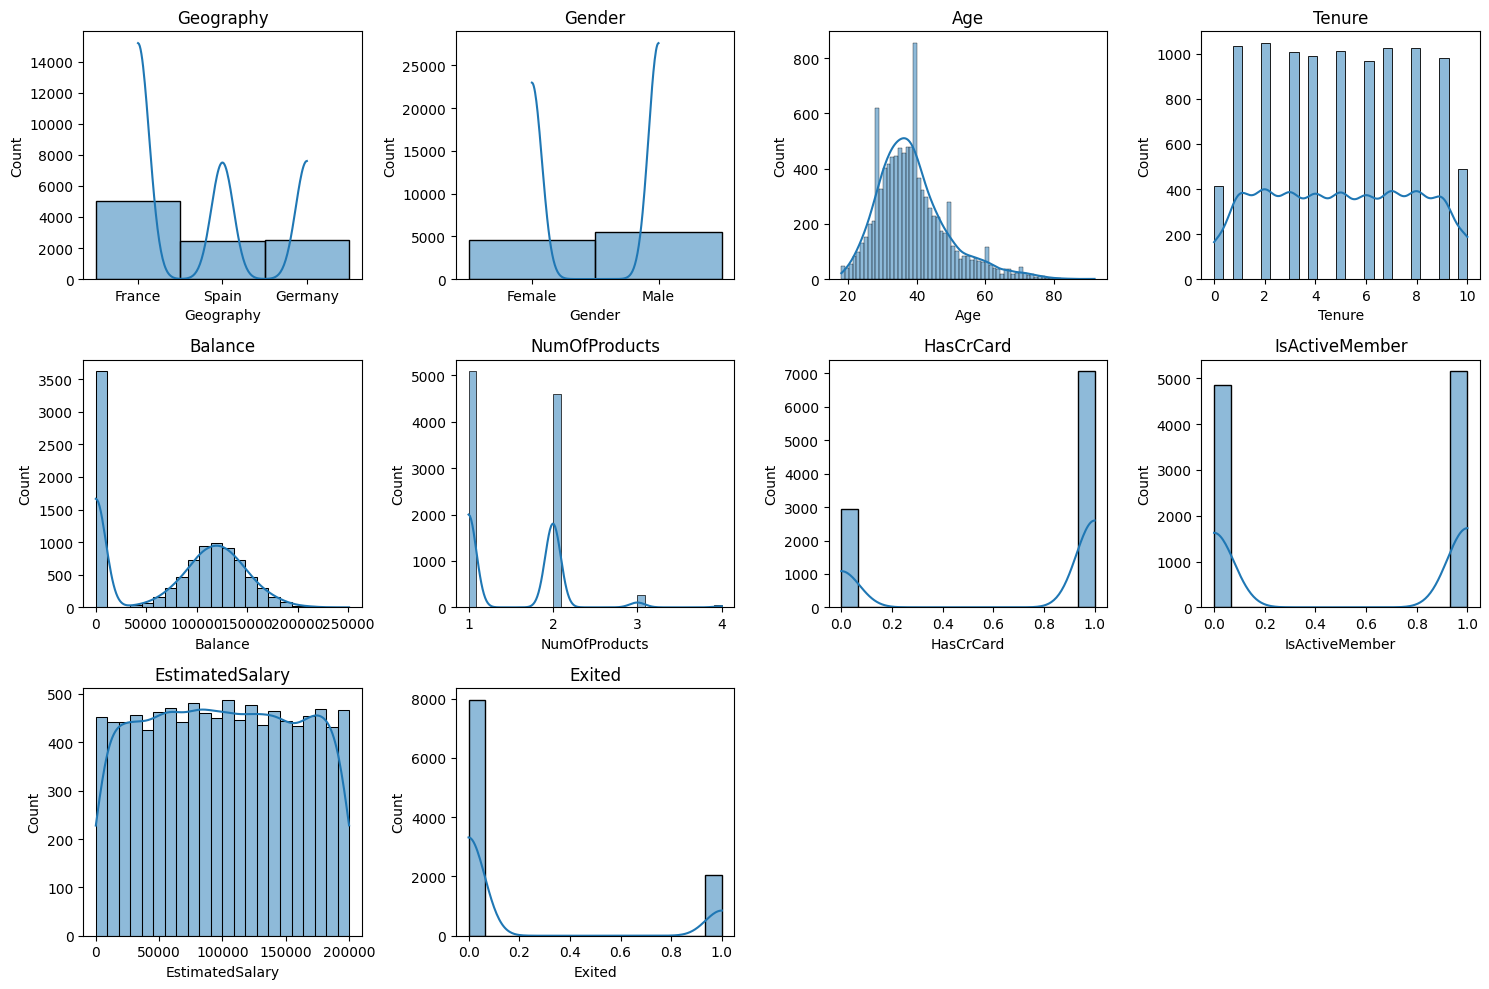

In [246]:
#plots to see the distribution of the data
plt.figure(figsize=(15,10))
for i in range(1,len(df.columns)):
    plt.subplot(3,4,i)
    sns.histplot(df[df.columns[i]],kde=True)
    plt.title(df.columns[i])
plt.tight_layout()
plt.show()


In [247]:
# #scale the data
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()

# df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]=scaler.fit_transform(df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

# df.head()




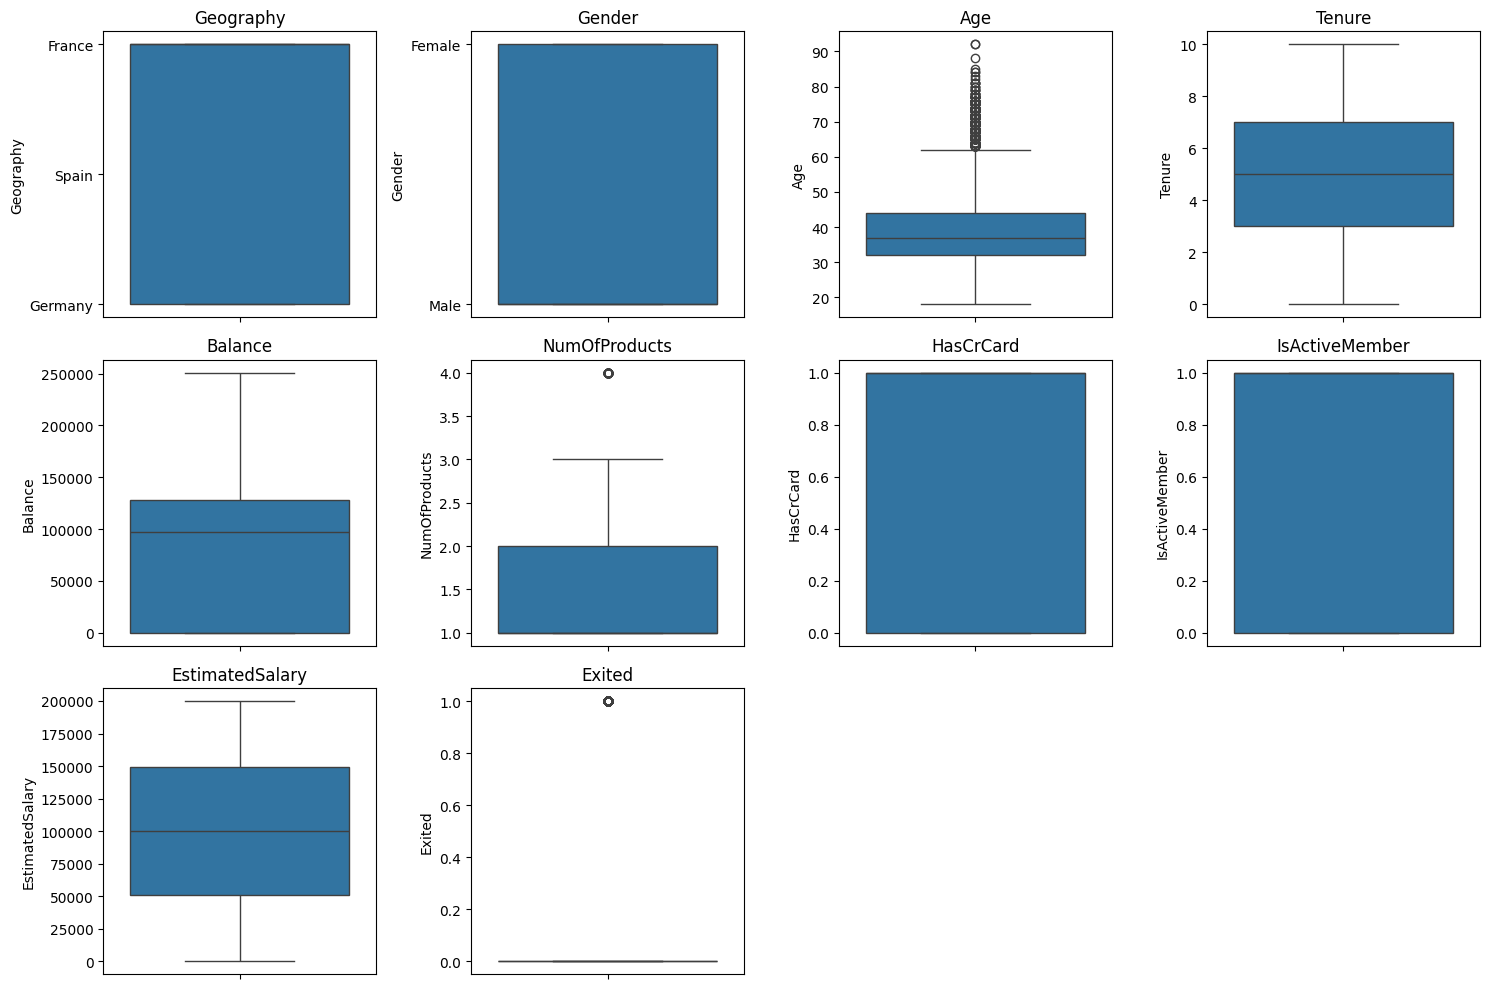

In [248]:
#outliers detection and removal

plt.figure(figsize=(15,10))
for i in range(1,len(df.columns)):
    plt.subplot(3,4,i)
    sns.boxplot(df[df.columns[i]])
    plt.title(df.columns[i])
plt.tight_layout()
plt.show()





    

In [249]:
#numeric columns 
num_cols=[i for i in df.columns if df[i].dtype!='O']





In [250]:
# robust Scaler to scale 
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

df[num_cols]=scaler.fit_transform(df[num_cols])

df.head()


    

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.246269,France,Female,0.416667,-0.75,-0.761480,0.0,0.0,0.0,0.011739,1.0
1,-0.328358,Spain,Female,0.333333,-1.00,-0.104906,0.0,-1.0,0.0,0.125512,0.0
2,-1.119403,France,Female,0.416667,0.75,0.489346,2.0,0.0,-1.0,0.139630,1.0
3,0.350746,France,Female,0.166667,-1.00,-0.761480,1.0,-1.0,-1.0,-0.064717,0.0
4,1.477612,Spain,Female,0.500000,-0.75,0.221806,0.0,0.0,0.0,-0.214561,0.0


In [251]:
df.shape

(10000, 11)

In [252]:
#one hot encoding the categorical columns using get_dummies
df=pd.get_dummies(df,columns=['Geography'])

df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,-0.246269,Female,0.416667,-0.75,-0.761480,0.0,0.0,0.0,0.011739,1.0,True,False,False
1,-0.328358,Female,0.333333,-1.00,-0.104906,0.0,-1.0,0.0,0.125512,0.0,False,False,True
2,-1.119403,Female,0.416667,0.75,0.489346,2.0,0.0,-1.0,0.139630,1.0,True,False,False
3,0.350746,Female,0.166667,-1.00,-0.761480,1.0,-1.0,-1.0,-0.064717,0.0,True,False,False
4,1.477612,Female,0.500000,-0.75,0.221806,0.0,0.0,0.0,-0.214561,0.0,False,False,True


In [253]:

#map the Gender
df['Gender'] = df['Gender'].map({'Male':True,'Female':False})

df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,-0.246269,False,0.416667,-0.75,-0.761480,0.0,0.0,0.0,0.011739,1.0,True,False,False
1,-0.328358,False,0.333333,-1.00,-0.104906,0.0,-1.0,0.0,0.125512,0.0,False,False,True
2,-1.119403,False,0.416667,0.75,0.489346,2.0,0.0,-1.0,0.139630,1.0,True,False,False
3,0.350746,False,0.166667,-1.00,-0.761480,1.0,-1.0,-1.0,-0.064717,0.0,True,False,False
4,1.477612,False,0.500000,-0.75,0.221806,0.0,0.0,0.0,-0.214561,0.0,False,False,True


In [254]:
import category_encoders as ce

encoder = ce.WOEEncoder(cols=['Gender','HasCrCard','IsActiveMember'])
encoder.fit(df[['Gender','HasCrCard','IsActiveMember']],y)
df_woe = encoder.transform(df[['Gender','HasCrCard','IsActiveMember']])
df_woe.head()


df.drop(['Gender','HasCrCard','IsActiveMember'],axis=1,inplace=True)
df = pd.concat([df,df_woe],axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender,HasCrCard,IsActiveMember
0,-0.246269,0.416667,-0.75,-0.761480,0.0,0.011739,1.0,True,False,False,0.268381,-0.011695,-0.429388
1,-0.328358,0.333333,-1.00,-0.104906,0.0,0.125512,0.0,False,False,True,0.268381,0.027682,-0.429388
2,-1.119403,0.416667,0.75,0.489346,2.0,0.139630,1.0,True,False,False,0.268381,-0.011695,0.360883
3,0.350746,0.166667,-1.00,-0.761480,1.0,-0.064717,0.0,True,False,False,0.268381,0.027682,0.360883
4,1.477612,0.500000,-0.75,0.221806,0.0,-0.214561,0.0,False,False,True,0.268381,-0.011695,-0.429388


In [255]:
# #Encode Geographhy
# encoder = ce.WOEEncoder(cols=['Geography'])
# encoder.fit(df[['Geography']],y)
# df_woe = encoder.transform(df[['Geography']])
# df_woe.head()

# df_woe['Geography'].value_counts()

# df.drop('Geography',axis=1,inplace=True)

# df = pd.concat([df,df_woe],axis=1)

# df.head()


In [256]:
#NAN values
df.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender               0
HasCrCard            0
IsActiveMember       0
dtype: int64

In [257]:
#outliers

In [258]:
#see where is France in the data
X=  df.drop('Exited',axis=1)
y= df['Exited']


In [259]:
#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [260]:
#build the model


In [261]:
# # quantile encoder
# encoder=ce.QuantileEncoder()

# encoder = ce.QuantileEncoder(cols=['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary'])


# # encoder.fit(X_train,y_train)

# X_train_encoded=encoder.transform(X_train)
# X_test_encoded=encoder.transform(X_test)

In [265]:
#train and evaluate the model (all)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

models=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier()]

for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(model)
    print('Accuracy:',accuracy_score(y_test,y_pred))
    # print('Confusion Matrix:',confusion_matrix(y_test,y_pred))
    print('Classification Report:',classification_report(y_test,y_pred))
    print('Cross Validation:',cross_val_score(model,X,y,cv=5).mean())

    
    print('----------------------')

    

LogisticRegression()
Accuracy: 0.8115
Classification Report:               precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      1607
         1.0       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



Cross Validation: 0.8099999999999999
----------------------
RandomForestClassifier()
Accuracy: 0.8665
Classification Report:               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1607
         1.0       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Cross Validation: 0.8640000000000001
----------------------
DecisionTreeClassifier()
Accuracy: 0.783
Classification Report:               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1607
         1.0       0.45      0.49      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.67      2000
weighted avg       0.79      0.78      0.79      2000

Cross Validation: 0.7923000000000001
----------------------
SVC()
Accuracy: 0.86
Classification R

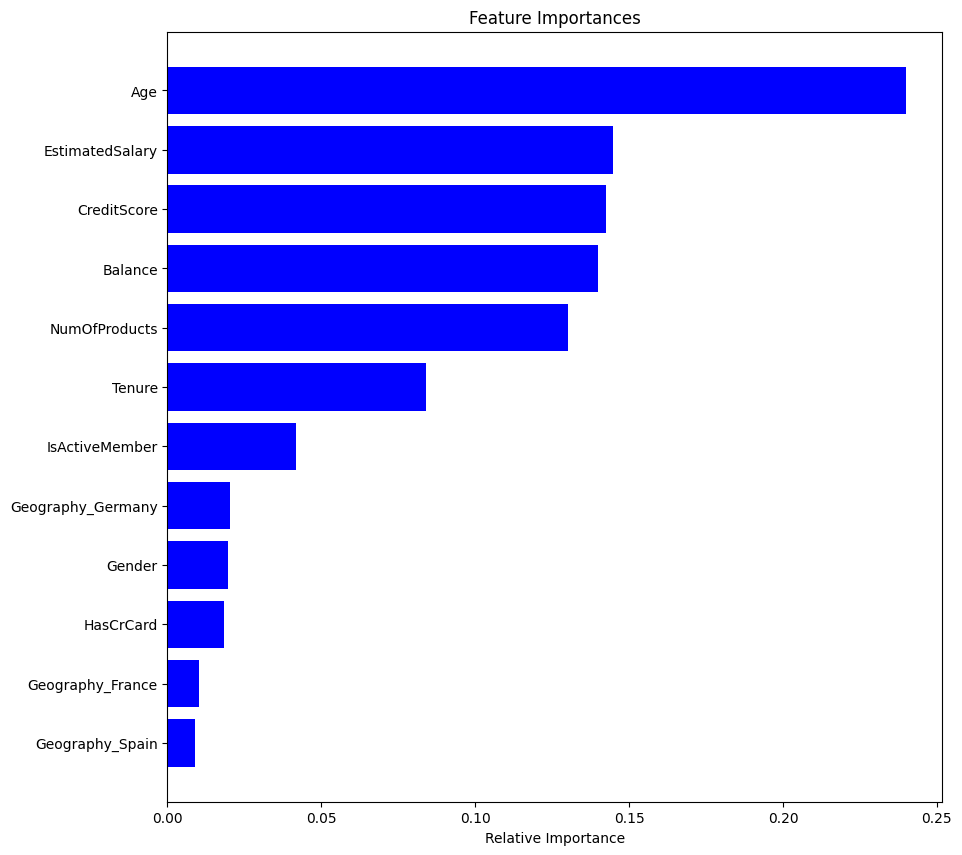

In [270]:
#learn the feature importance
model=RandomForestClassifier()
model.fit(X_train,y_train)
importances=model.feature_importances_
features=X_train.columns
indices=np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

